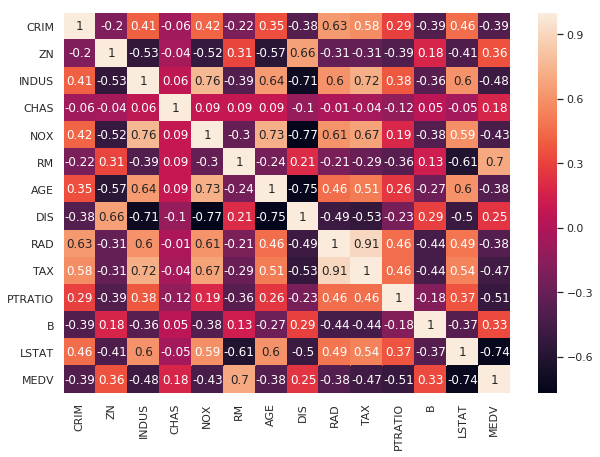

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.externals import joblib


rmse = lambda y, _y: np.sqrt(mse(y, _y))
sns.set(rc={'figure.figsize':(10, 7,)})

dataset = load_boston()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names).dropna()
df['MEDV'] = dataset.target
# print(dataset['DESCR'])

sns.heatmap(df.corr().round(2), annot=True)
plt.show()

Train RMSE with RM: 6.40
Test RMSE with RM: 7.07


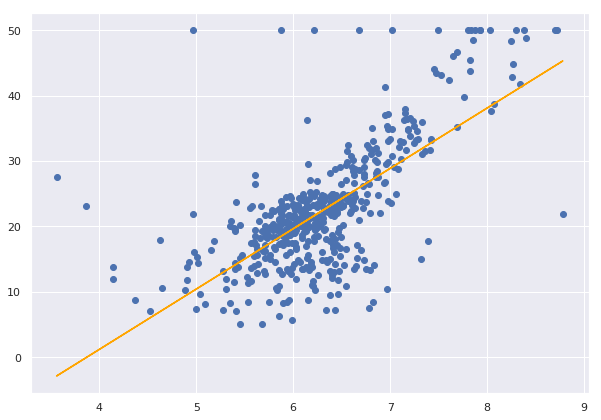

In [3]:
X, y = df['RM'].values, df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)

print( 'Train RMSE with RM: %.2f' % rmse(y_train, model.predict(X_train)) )
print( 'Test RMSE with RM: %.2f' % rmse(y_test, model.predict(X_test)) )

plt.scatter(X, y)
plt.plot(X, model.predict(X.reshape(-1,1)), color='orange')
plt.show()

Train RMSE with LSTAT: 6.23
Test RMSE LSTAT: 6.22


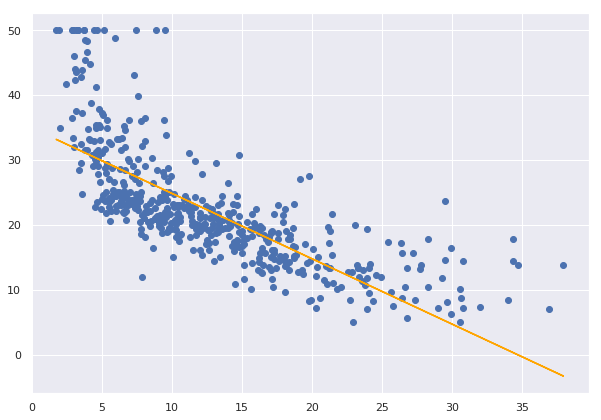

In [4]:
X, y = df['LSTAT'].values, df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)

print( 'Train RMSE with LSTAT: %.2f' % rmse(y_train, model.predict(X_train)) )
print( 'Test RMSE LSTAT: %.2f' % rmse(y_test, model.predict(X_test)) )

plt.scatter(X, y)
plt.plot(X, model.predict(X.reshape(-1,1)), color='orange')
plt.show()

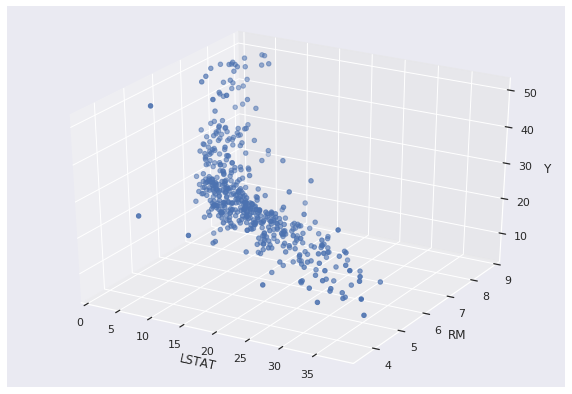

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'].values, df['RM'].values, y )
ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('Y')
plt.show()

In [6]:
X = pd.DataFrame(data=np.c_[df['LSTAT'].values, df['RM'].values], columns=['LSTAT','RM'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True)

model = LinearRegression()
model.fit(X_train, y_train)

print( 'Train RMSE with LSTAT: %.2f' % rmse(y_train, model.predict(X_train)) )
print( 'Test RMSE LSTAT: %.2f' % rmse(y_test, model.predict(X_test)) )

Train RMSE with LSTAT: 5.19
Test RMSE LSTAT: 6.30
